# house prices advanced regression techniques
We are trying to estimate the prices of houses based on the infomation
The selected performance measure for this problem is Root Mean Square Error (RMSE), which is following;

$ \begin{equation*}
    RMSE(X,h) = \sqrt{\frac{1}{m} \sum^m_{i=1} \left( h(x^(i)) - y^(i) \right)}^2 
    \end{equation*} $

In [19]:
import os
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt

## Exploratory Analysis

In [20]:
DOWNLOAD_ROOT = 'datasets'
def fetch_data(path=DOWNLOAD_ROOT):
    os.makedirs(path, exist_ok=True)
    os.system('kaggle competitions download -c house-prices-advanced-regression-techniques -p ' + path)
    zip_path = os.path.join(path, 'house-prices-advanced-regression-techniques.zip')
    with ZipFile(zip_path, 'r') as zip:
        zip.extractall(path=path)
        print('successfully fetched datasets at ' + os.path.abspath(path))
        
def load_trainset_testset(path=DOWNLOAD_ROOT):
    train_path = os.path.join(path, 'train.csv')
    test_path = os.path.join(path, 'test.csv')
    
    return pd.read_csv(train_path), pd.read_csv(test_path)

In [21]:
fetch_data()
housing_train, housing_test = load_trainset_testset()

successfully fetched datasets at C:\Users\fbab9\OneDrive\Documents\Personal Project\Data-science-portfolio\Notebooks\Supervised\House-price-prediction\datasets


In [28]:
housing_train.info()
housing_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


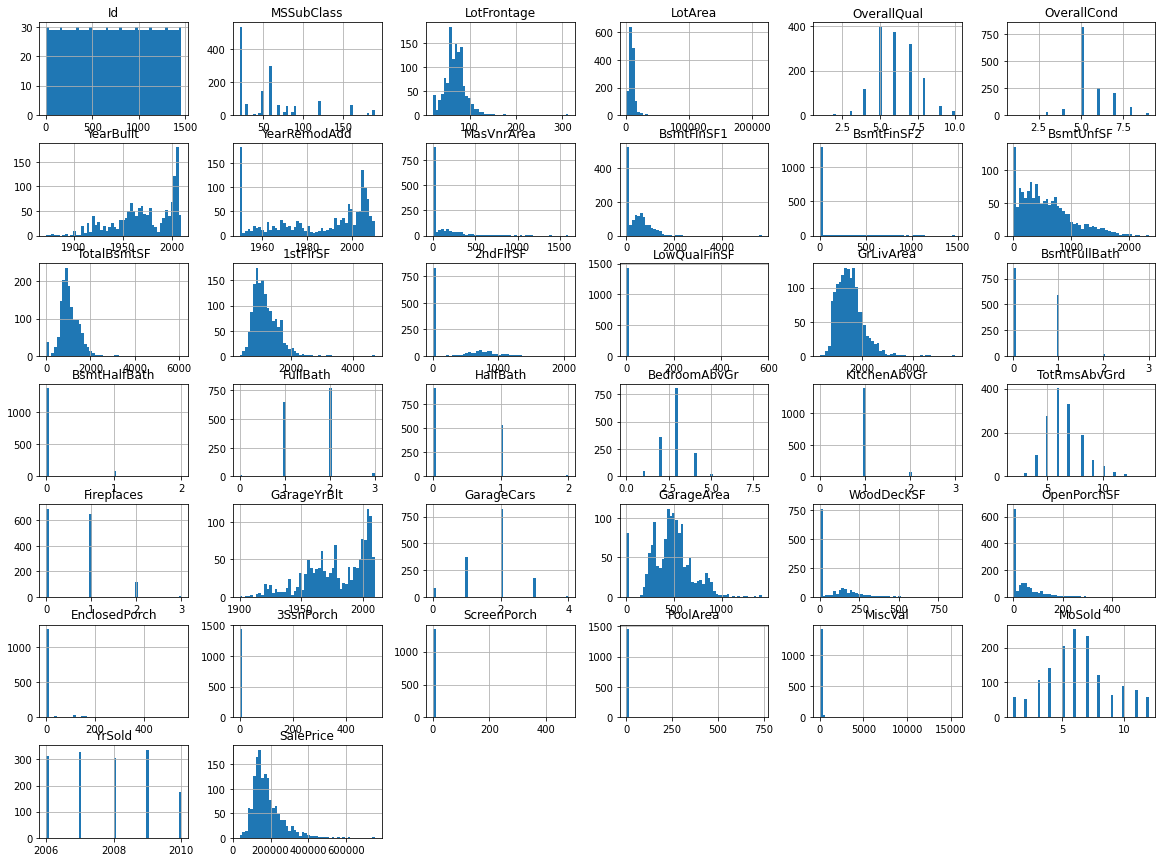

In [31]:
housing_train.hist(bins=50, figsize=(20,15))
plt.show()

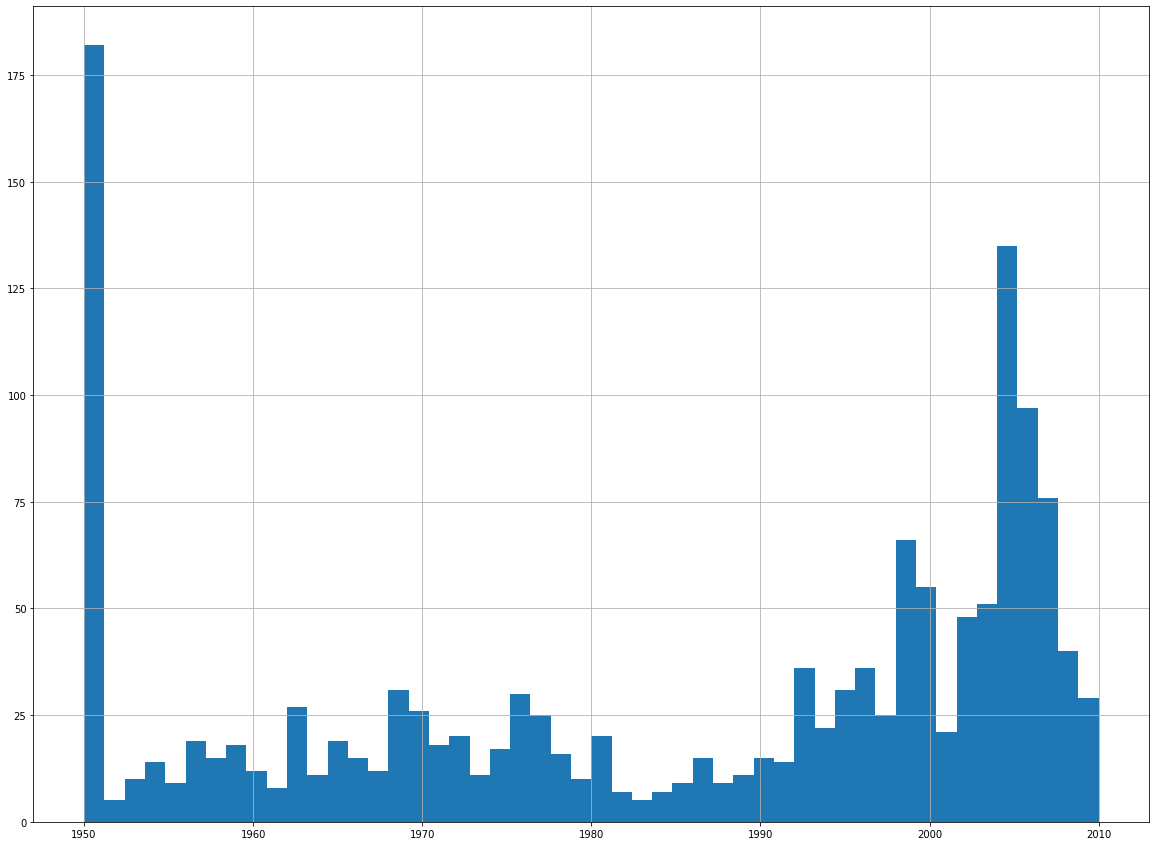

In [33]:
housing_train['YearRemodAdd'].hist(bins=50, figsize=(20,15))
plt.show()

The remodel date seems to be capped at 1950. It would be better to remove data with 1950 as YearRemodAdd.

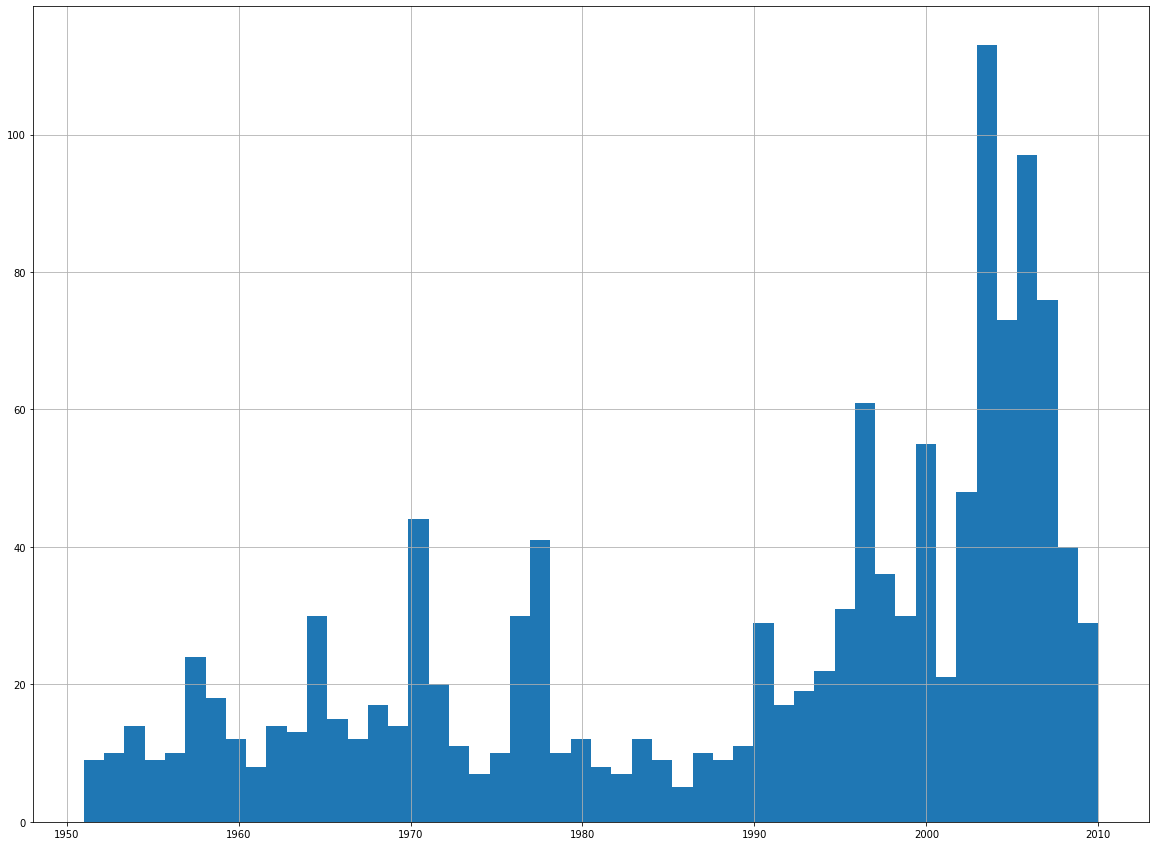

In [37]:
housing_train = housing_train[housing_train['YearRemodAdd'] != 1950]
housing_train['YearRemodAdd'].hist(bins=50, figsize=(20,15))
plt.show()

housing_test = housing_tset[housing_test['YearRemodAdd'] != 1950

<AxesSubplot:xlabel='YearBuilt', ylabel='OverallQual'>

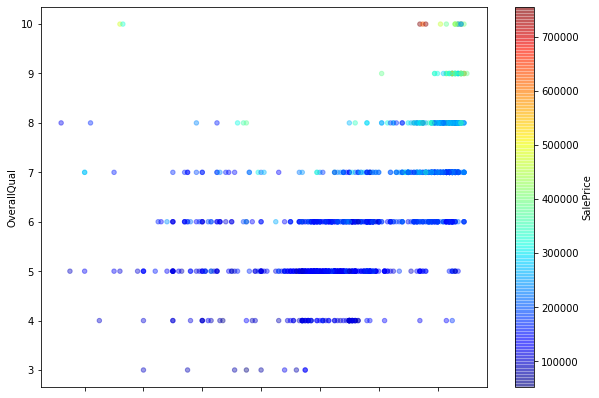

In [47]:
housing = housing_train.copy()

housing.plot(kind='scatter', x='YearBuilt', y='OverallQual', alpha=0.4, figsize=(10,7), c='SalePrice', cmap=plt.get_cmap('jet'), colorbar=True,)

In [48]:
corr_matrix = housing.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.788013
GrLivArea        0.712719
GarageCars       0.632294
GarageArea       0.616062
TotalBsmtSF      0.589496
1stFlrSF         0.579819
FullBath         0.542965
TotRmsAbvGrd     0.542635
Fireplaces       0.467423
YearBuilt        0.467037
MasVnrArea       0.461126
GarageYrBlt      0.452434
YearRemodAdd     0.438158
BsmtFinSF1       0.348256
LotFrontage      0.339317
2ndFlrSF         0.334371
OpenPorchSF      0.319455
WoodDeckSF       0.298080
LotArea          0.255077
HalfBath         0.248902
BsmtUnfSF        0.227661
BsmtFullBath     0.197470
BedroomAbvGr     0.148245
ScreenPorch      0.100095
PoolArea         0.090323
MoSold           0.035852
3SsnPorch        0.033112
LowQualFinSF     0.007868
Id              -0.020819
MiscVal         -0.021305
BsmtHalfBath    -0.029703
YrSold          -0.036347
BsmtFinSF2      -0.039634
EnclosedPorch   -0.073265
MSSubClass      -0.104822
KitchenAbvGr    -0.131169
OverallCond     -0.135752
Name: SalePr

In [55]:
housing['HasPool'] = housing['PoolArea'] != 0
housing['Bedrooms_per_room'] = housing['BedroomAbvGr']/housing['TotRmsAbvGrd']
corr_matrix = housing.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice            1.000000
OverallQual          0.788013
GrLivArea            0.712719
GarageCars           0.632294
GarageArea           0.616062
TotalBsmtSF          0.589496
1stFlrSF             0.579819
FullBath             0.542965
TotRmsAbvGrd         0.542635
Fireplaces           0.467423
YearBuilt            0.467037
MasVnrArea           0.461126
GarageYrBlt          0.452434
YearRemodAdd         0.438158
BsmtFinSF1           0.348256
LotFrontage          0.339317
2ndFlrSF             0.334371
OpenPorchSF          0.319455
WoodDeckSF           0.298080
LotArea              0.255077
HalfBath             0.248902
BsmtUnfSF            0.227661
BsmtFullBath         0.197470
BedroomAbvGr         0.148245
ScreenPorch          0.100095
HasPool              0.091629
PoolArea             0.090323
MoSold               0.035852
3SsnPorch            0.033112
LowQualFinSF         0.007868
Id                  -0.020819
MiscVal             -0.021305
BsmtHalfBath        -0.029703
YrSold    

## Preparing data for algorithms